# KSA206: Polar Observations and Modelling

# Week 6 - Introduction to ACCESS-OM2

In the past couple of weeks we have used different types of oceanographic observations. Good quality observations are vital, but we have also seen how sparsely observed the Southern Ocean is due to its remote and harsh environment. Numerical models allow us to overcome, partially, the lack of data, using numerical methods to represent our understanding of the physics of the ocean within a simulation. Models not always offer an accurate or exhaustive representation of reality, but they provide a virtual "laboratory" from which we can explore and understand processes and mechanisms involved in different ocean phenomena. Numerical modelling supports and is supported by observational oceanography, and is one of the pillars of modern day oceanography and climate science. For example, a lot of our understanding of [future changes associated to climate change](https://www.wcrp-climate.org/wgcm-cmip) comes from numerical models!

## ACCESS-OM2 

<div style="float: right; margin-right: 20px; margin-left: 30px; width: 30%; max-width: 500px;">
    <img src="images/access-diagram.png" width="100%" />
</div>

ACCESS-OM2, short for Australian Community Climate and Earth-System Simulator Ocean Model 2, is a global, coupled ocean/sea ice model. What does this mean? The figure on the right, adapted from [Kiss et al. 2020](https://gmd.copernicus.org/articles/13/401/2020/), illustrates the model configuration. It has two "components", one of which is an ocean model (MOM) and the other a sea ice model (CICE). These two components are coupled, which really only means that the ocean can affect *and* be affected by sea ice, and viseversa. This coupled system is forced by a "prescribed" atmosphere, which means that the atmosphere is a boundary condition and is not affected by either the ocean or the sea ice. 

This is a model with quite high degree of complexity and it is what we would call (if we dare) a "realistic" model. There are also "idealised" models, that don't seek realism in their representation of the ocean state, but rather realism in a particular process (like mixing, which requires very high spatial resolution). And while ACCESS has the ability to reproduce a lot of the observed features of the Southern Ocean, it doesn't have the ability to represent others. For example, it doesn't have tides, or icebergs, or ice sheets. But it is still a fabulous model to use for a lot of applications.

Generally speaking, model resolution (the size of its grid and its timestep) and its degree of realism go hand in hand, but they also come at a computational cost. Higher resolution models will cbe more expensive to run and will create a larger dataset that is harder to store and analyse. To get an idea of how the ocean representation changes with resolution, the figures below show the surface current speeds at the southern tip of Africa, where the very energetic Agulhas current ends, for three different horizontal grid resolutions of ACCESS-OM2 (1 $^{\circ}$, 0.25 $^{\circ}$ and 0.1 $^{\circ})$:

<p align="center">
<img src="images/access-res-comp.png" width="70%"/>
</p>

This class we will use the 1 $^{\circ}$ resolution. As you increase resolution, the size of the data increases as well, requiring for special handling in order to do most calculations.

In [32]:
import cmocean as cm
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In the `data/` folder there are five different datasets:

 - `access-om2_depth.nc` has the variable `ht`, which is the bathymetry of the model
 - `access-om2_o2_avg_2000-2018.nc` has the variable `o2`, which is oxygen in units of mmol/m $^3$
 - `access-om2_temp_salt_avg_2000-2018.nc` has the 3D `temp` and `salt`, which are conservative temperature (in K) and practical salinity (in PSU)
 - `access-om2_u_v_avg_2000-2018.nc` has the 3D `u` and `v`, which are zonal and meridional velocities respectively, in m/s

All these variables where averaged over the period 2000 to 2018. Let's open `ht` first to see what the model data looks like:

In [33]:
depth = xr.open_dataset('data/access-om2_depth.nc')

In [34]:
depth

<xarray.Dataset>
Dimensions:   (yt_ocean: 72, xt_ocean: 360)
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... -37.46 -36.47 -35.48
    geolat_t  (yt_ocean, xt_ocean) float32 ...
    geolon_t  (yt_ocean, xt_ocean) float32 ...
Data variables:
    ht        (yt_ocean, xt_ocean) float32 ...
Attributes: (12/19)
    filename:                                 ocean_grid.nc
    title:                                    ACCESS-OM2-BGC
    grid_type:                                mosaic
    grid_tile:                                1
    intake_esm_vars:                          ht
    intake_esm_attrs:path:                    /g/data/ik11/outputs/access-om2...
    ...                                       ...
    intake_esm_attrs:variable_cell_methods:   time: point,time: point,time: p...
    intake_esm_attrs:variable_units:          m,m,degrees_N,degrees_E,degrees...
    intake_esm_attrs:filename:                ocean_grid.nc
    intake_esm_attrs:file_id:                 ocean_grid
    intake_esm_attrs:_data_format_:           netcdf
    intake_esm_dataset_key:                   ocean_grid.fx

And let's do a simple plot first:

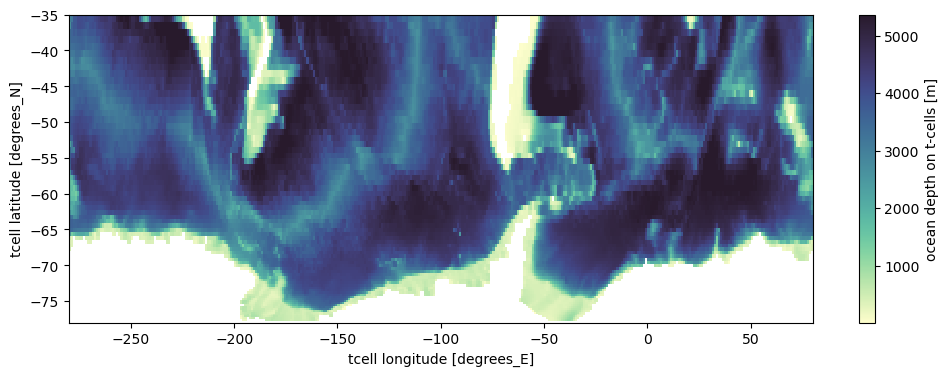

In [35]:
depth['ht'].plot(figsize = (12,4), cmap = cm.cm.deep)

There are several things to notice here:
1. The bathymetry looks a bit more grainy than the bathymetry dataset we used during Week 4. This is because the model is  grid is 1 $^{\circ}$ resolution, and the ETOPO dataset is of ~0.01 $^{\circ}$ (which means 10 times more points!)
2. The longitude, latitude dimensions say begin with "tcel", which is what the model calls "tracer" cells. More on that later.
3. The longitude, latitude dimensions are called `xt_ocean` and `yt_ocean`. And `xt_ocean` goes from -280 to 80 - which is not a usual longitude convention. But we can fix that easily if needed. But it is important to have in mind when doing spatial selections!

Now let's look at a 3D variable, say `temp`:

In [36]:
ds = xr.open_dataset('data/access-om2_temp_salt_avg_2000-2018.nc')
ds

<xarray.Dataset>
Dimensions:   (st_ocean: 50, yt_ocean: 72, xt_ocean: 360)
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... -37.46 -36.47 -35.48
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
Data variables:
    salt      (st_ocean, yt_ocean, xt_ocean) float32 ...
    temp      (st_ocean, yt_ocean, xt_ocean) float32 ...

In [37]:
temp = ds['temp']
temp

<xarray.DataArray 'temp' (st_ocean: 50, yt_ocean: 72, xt_ocean: 360)>
[1296000 values with dtype=float32]
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... -37.46 -36.47 -35.48
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03

As you can see, temperature in the model comes in degrees K. Let's convert to deg C:

In [38]:
temp = temp - 273.15

Now, aside from our `xt_ocean`, `yt_ocean` dimensions, we also have `st_ocean`, which is our vertical coordinate. Let's create a random cross section at 10E and plot with horizontal lines for each level in `st_ocean`:

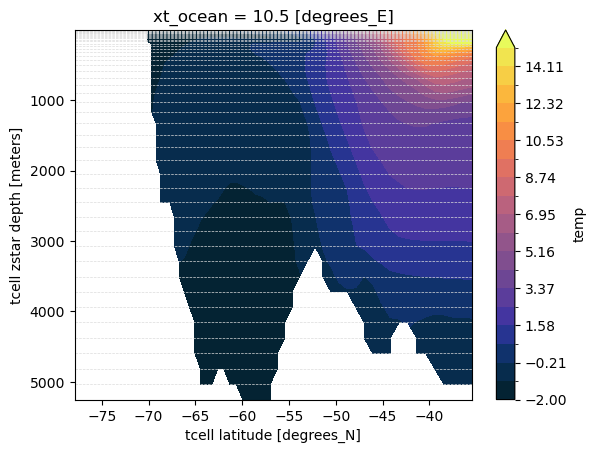

In [39]:
temp.sel(xt_ocean = 10, method = 'nearest').plot.contourf(yincrease = False, vmin = -2, vmax = 15, levels = 20, cmap = cm.cm.thermal)
for depth in temp['st_ocean']:
    plt.axhline(y = depth, color = 'gainsboro', linestyle = '--', linewidth = .5)

You can see how the size of thickness of the cells is not uniform! There are smaller gridcells at the surface, and thicker at the bottom. This is because the surface of the ocean has larger variability than the bottom, where properties change slowly and over large spatial distances, and so we need higher resolution at the top to properly represent it. 

<h4 style="color: red;">Question 1</h4>

Plot surface salinities from the model (`salt` variable in our `ds`). Bonus point if you plot it within a stereographic map!

*Answer here*

<h4 style="color: red;">Question 2</h4>

Open the oxygen dataset and look at its attributes. Are the coordinates the same as the temperature and salinity? Are the depth levels the same? What are the units? Do one or two plots of this variable.

*Answer here*

Noe let's look at velocities:

In [40]:
vel = xr.open_dataset('data/access-om2_u_v_avg_2000-2018.nc')
vel

<xarray.Dataset>
Dimensions:   (st_ocean: 50, yu_ocean: 71, xu_ocean: 360)
Coordinates:
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
  * xu_ocean  (xu_ocean) float64 -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yu_ocean  (yu_ocean) float64 -77.75 -77.51 -77.26 ... -37.95 -36.96 -35.98
Data variables:
    v         (st_ocean, yu_ocean, xu_ocean) float32 ...
    u         (st_ocean, yu_ocean, xu_ocean) float32 ...

Paying attention, you will see that now our coordinates are called `xu_ocean` and `yu_ocean`. This is not the same as `xt_ocean` and `yt_ocean`! Why?

<div style="float: right; margin-right: 20px; margin-left: 30px; width: 20%; max-width: 500px;">
    <img src="images/arakawa.png" width="100%" />
</div>

We have been working with observations so far, which name their dimensions some variation of `lat`, `lon`. Numerical models need to have a grid that allows to numerically represent physical processes (such as advection of tracers, transport, mixing, etc), so their dimensions are slightly more complicated. 

ACCESS-OM2 uses an Arakawa B-grid, which is a "staggered" grid, where scalars are evaluated at the center of the cells, and vectors at the edges (schamatic on the right). In ACCESS, the dimension in the center of cells is denoted with a `t`, and in the corners with a `u`. 

So, our depth variable is positioned in the center of the cells and its longitude dimension is called `xt_ocean`, its latitude `yt_ocean`. This is the same for temperature, salinity, oxygen, and any other "tracer". Vectors, like transports and velocities, are located on the corner of the cells, in the u-grid.

Let's take a look at a small section to verify they are staggered with respect to the `xt_ocean`:

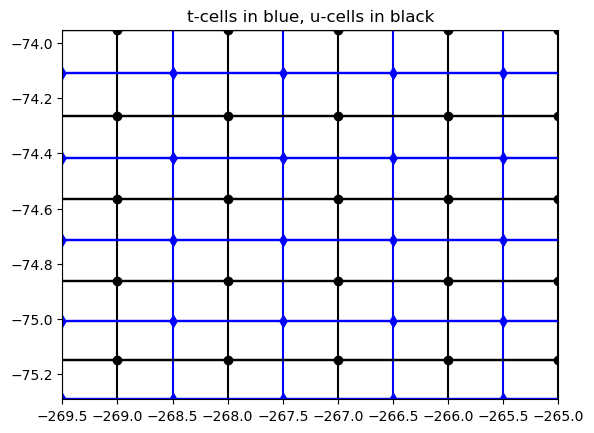

In [41]:
for x in range(10, 15):
    plt.axvline(x = temp['xt_ocean'][x], color = 'blue')
    plt.axvline(x = vel['xu_ocean'][x], color = 'k')
    for y in range(10, 15):
        plt.axhline(y = temp['yt_ocean'][y], color = 'blue')
        plt.axhline(y = vel['yu_ocean'][y], color = 'k')
        plt.scatter(temp['xt_ocean'][x], temp['yt_ocean'][y], color = 'blue', marker = 'd')
        plt.scatter(vel['xu_ocean'][x], vel['yu_ocean'][y], color = 'k', marker = 'o')
plt.xlim(temp['xt_ocean'][10], vel['xu_ocean'][14])
plt.ylim(temp['yt_ocean'][10], vel['yu_ocean'][14])
plt.title('t-cells in blue, u-cells in black');

Again, this is good to know - but you should only be concerned with it for a couple of particular situations. For example, if you want to do a calculation that requires a variable in t-cell and a variable in a u-cell, like heat transport (temperature and velocities).

Let's do a cross-section of zonal velocities:

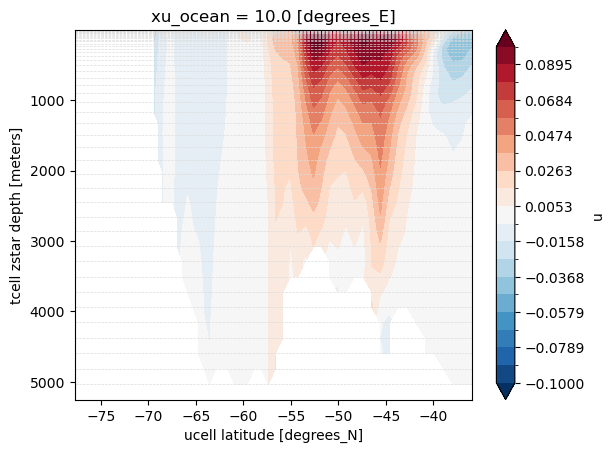

In [42]:
vel['u'].sel(xu_ocean = 10, method = 'nearest').plot.contourf(yincrease = False, vmin = -.1, vmax = .1, levels = 20, cmap = 'RdBu_r')
for depth in vel['st_ocean']:
    plt.axhline(y = depth, color = 'gainsboro', linestyle = '--', linewidth = .5)

The vertical levels are the same as in the t-cells.

<h4 style="color: red;">Question 3</h4>

Calculate surface ocean speed, and plot it. Compare it to the mean geostrophic speed you obtained last week in `4_Circulation_from_geostrophic_currents.ipynb` and discuss the differences and what are they due to.

*Answer here*